# Simple region masking code using matplotlib and numpy

## Import libs

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

## Read image

This image is: <type 'numpy.ndarray'> with dimensions: (540, 960, 3)


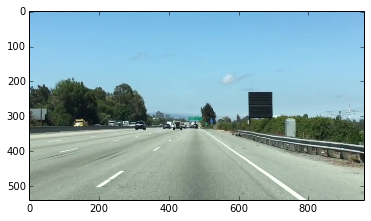

In [2]:
img = mpimg.imread('test.jpg')
print 'This image is: {} with dimensions: {}'.format(type(img),img.shape)

#show the image
plt.imshow(img)

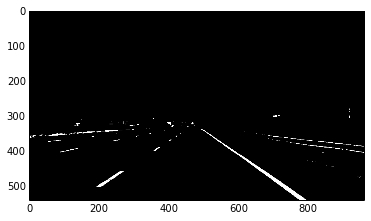

In [3]:
#threshold value
red_threshold = 200
green_threshold = 200
blur_threshold = 200
thresholds = [red_threshold,green_threshold,blur_threshold]

#threshold image
selectedImage =  ((img[...,0] > thresholds[0]) & \
                 (img[...,1] > thresholds[1]) & \
                 (img[...,2] > thresholds[2])).astype(int)*255
        
#show the image
plt.imshow(selectedImage,cmap='gray')

## Masking

In [4]:
#get the image size
imgH, imgW, _ = img.shape

In [15]:
#define the triangle which determine the region being masked
apexes = [(imgW/2,imgH/2 + 50),
          (0,imgH),
          (imgW,imgH)]

In [16]:
#fit the lines (y = Ax+B) to determine the 3 sides of the triangle
left_line = np.polyfit((apexes[0][0],apexes[1][0]),(apexes[0][1],apexes[1][1]),1)
right_line = np.polyfit((apexes[0][0],apexes[2][0]),(apexes[0][1],apexes[2][1]),1)
bottom_line = np.polyfit((apexes[1][0],apexes[2][0]),(apexes[1][1],apexes[2][1]),1)

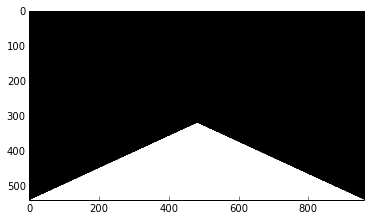

In [17]:
#generate the mask region
XX,YY = np.meshgrid(np.arange(0,imgW),np.arange(0,imgH))

mask =  (YY > (XX*left_line[0] + left_line[1]))  & \
        (YY > (XX*right_line[0] + right_line[1])) & \
        (YY < (XX*bottom_line[0] + bottom_line[1]))

#show the image
plt.imshow(mask,cmap='gray')

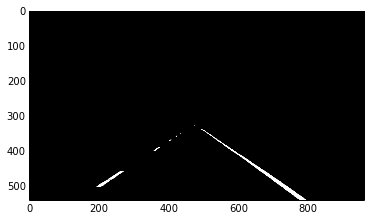

In [20]:
selectedImage = np.copy(selectedImage)
selectedImage[(~mask)] = 0
#show the image
plt.imshow(selectedImage,cmap='gray')

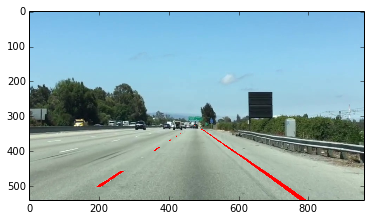

In [21]:
img[selectedImage > 0] = [255,0,0]
plt.imshow(img)